# Implementasi K-NN(Tugas 3)

### Konsep Dasar

**Pengertian**

K-NN merupakan kepanjangan dari K-Nearest Neighbor. Algoritma K-NN merupakan algoritma klasifikasi yang bekerja dengan mengambil sejumlah K data terdekat (tetangganya) sebagai acuan untuk menentukan kelas dari data baru. Algoritma ini mengklasifikasikan data berdasarkan similarity atau kemiripan atau kedekatannya terhadap data lainnya.

**Algoritma K-NN**

1. Menentukan nilai K
2. Menghitung jarak anatar data uji dengan data latih
3. mengurutkan data berdasarkan jarak secara ascending
4. mengambil data sebanyak k terdekat
5. memilih kelas mayor

### Implementasi

In [ ]:
%matplotlib inline

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import *
from sklearn.model_selection import train_test_split

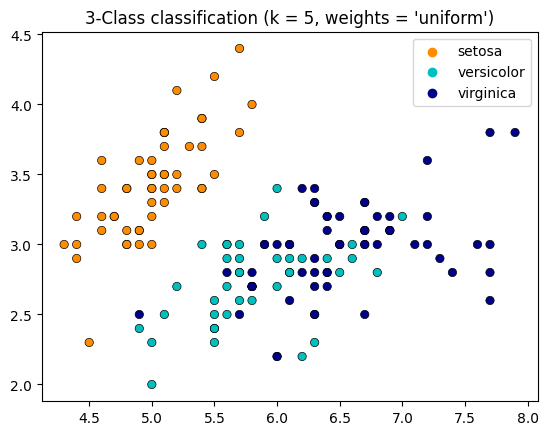

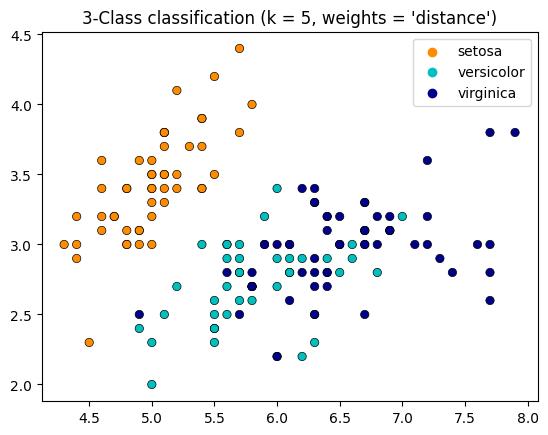

In [ ]:

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :5]
y = iris.target

#split dataset into train an test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train,y_train)

    ax = plt.subplots()
    # sk.DecisionBoundaryDisplay.from_estimator(
    #     clf,
    #     X,
    #     cmap=cmap_light,
    #     ax=ax,
    #     response_method="predict",
    #     plot_method="pcolormesh",
    #     xlabel=iris.feature_names[0],
    #     ylabel=iris.feature_names[1],
    #     shading="auto",
    # )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

In [ ]:
#show first 5 model predictions on the test data
clf.predict(X_test)[0:29]

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1])

In [ ]:
clf.score(X_test, y_test)

0.9666666666666667